In [1]:
#data_import
import pandas as pd
df = pd.read_excel('Finaldata.xlsx')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype
0,Bahawalpur,2000-01-01,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,Bahawalpur,2000-01-02,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,Bahawalpur,2000-01-03,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,Bahawalpur,2000-01-04,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,Bahawalpur,2000-01-05,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [2]:
#Overview of the whole dataset
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover
count,129124.000000,129124.000000,126196.000000,129124.000000,129124.000000,126196.000000,126196.000000,109943.000000,126196.000000,133113.000000
mean,30.420670,18.432944,24.763738,32.424614,19.038843,26.240383,58.749505,2.817872,24.179847,2.995352
std,9.130798,8.704874,8.040871,11.121978,9.874659,9.787379,16.794133,13.688582,42.817452,8.601150
min,0.000000,-5.900000,1.200000,-2.200000,-6.700000,-2.200000,5.700000,0.000000,0.000000,0.000000
25%,24.200000,11.000000,17.700000,24.200000,11.000000,17.600000,46.900000,0.000000,0.000000,0.000000
50%,32.100000,19.700000,26.600000,32.900000,19.700000,26.700000,61.000000,0.000000,0.000000,0.000000
75%,37.000000,26.100000,31.400000,41.600000,26.100000,34.500000,70.900000,0.101000,0.000000,0.000000
max,58.000000,45.600000,45.600000,78.600000,53.300000,59.700000,100.000000,450.173000,100.000000,100.000000


In [3]:
df['name'].unique()

array(['Bahawalpur', 'Dera Ghazi Khan', 'Faisalabad', 'Gujranwala',
       'Gujrat', 'Jhelum', 'Kasur', 'Lahore ', 'Multan', 'Okara',
       'Rahimyar Khan', 'Rawalpindi ', 'Sargodha', 'Sheikhupura',
       'Sialkot', 'Sargodha ', 'Rahim Yar Khan'], dtype=object)

In [4]:
#Data_manipulation/cleaning
df['name'] = df['name'].str.replace('Rahimyar Khan', 'Rahim Yar Khan' )

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['name'] = df['name'].apply(lambda x : x.strip())

In [7]:
df.set_index('datetime', inplace=True)

In [8]:
df.sort_index(inplace=True)

In [9]:
#Dataframe (df) changed to dff (No null values)
dff=df.dropna(subset='temp')
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126196 entries, 2000-01-01 to 2024-06-30
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          126196 non-null  object 
 1   tempmax       126196 non-null  float64
 2   tempmin       126196 non-null  float64
 3   temp          126196 non-null  float64
 4   feelslikemax  126196 non-null  float64
 5   feelslikemin  126196 non-null  float64
 6   feelslike     126196 non-null  float64
 7   humidity      126196 non-null  float64
 8   precip        109943 non-null  float64
 9   precipprob    126196 non-null  float64
 10  precipcover   126196 non-null  float64
 11  preciptype    30777 non-null   object 
dtypes: float64(10), object(2)
memory usage: 12.5+ MB


In [10]:
dff.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype
datetime,,,,,,,,,,,,
2000-01-01,Lahore,18.1,1.1,11.1,18.1,1.1,11.1,79.0,0.0,0.0,0.0,NaN
2000-01-01,Gujranwala,18.1,1.1,11.0,18.1,1.1,11.0,79.3,0.0,0.0,0.0,NaN
2000-01-01,Rawalpindi,18.1,3.1,9.5,18.1,3.1,9.5,69.1,0.0,0.0,0.0,NaN
2000-01-01,Faisalabad,14.1,9.7,12.2,14.1,9.7,12.2,96.0,0.0,0.0,0.0,NaN
2000-01-01,Kasur,18.1,1.1,11.0,18.1,1.1,11.0,79.2,0.0,0.0,0.0,NaN


In [11]:
#Faisalabad city daily data visualization
dff_fsd = dff[dff['name']=='Faisalabad']

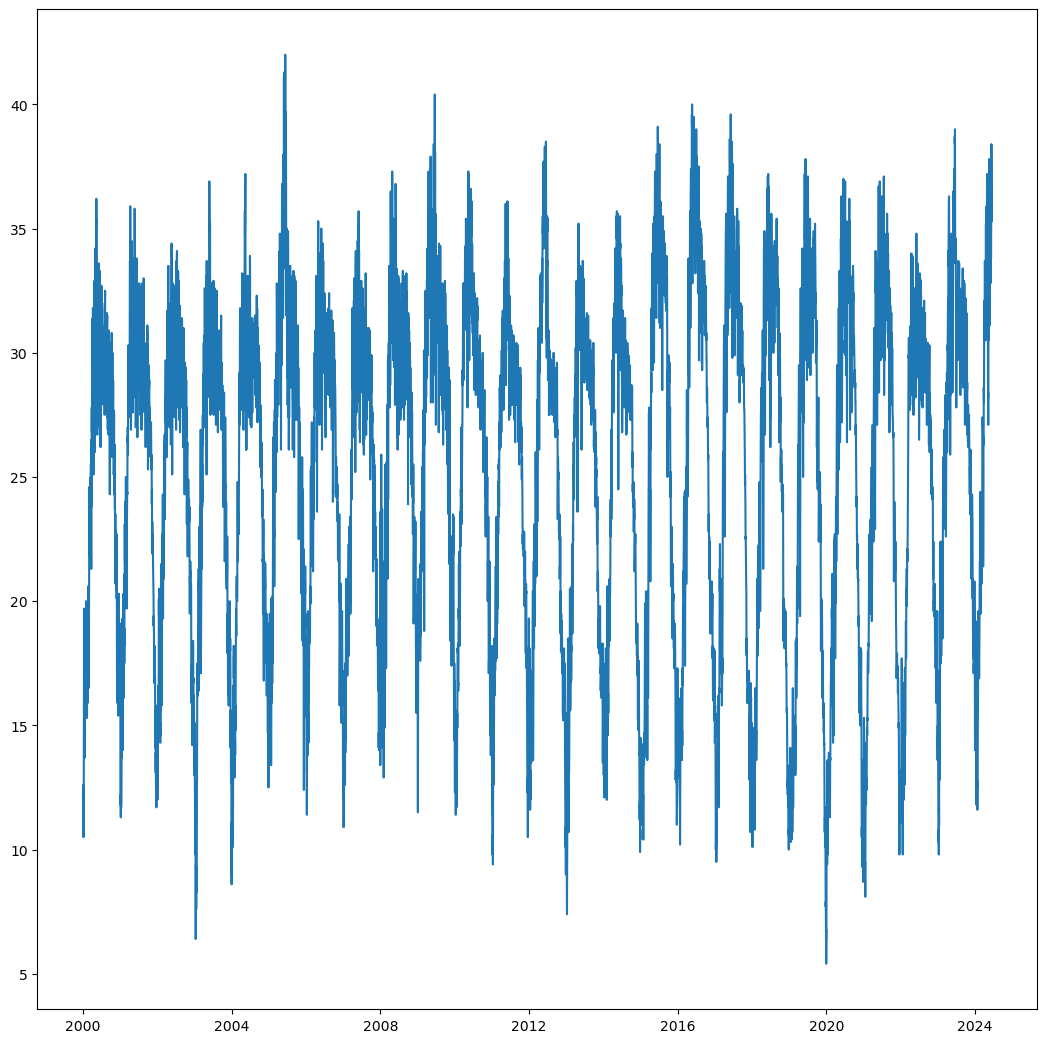

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax = fig.add_axes((0, 0, 1, 1),facecolor="w")
ax.plot(dff_fsd.index,dff_fsd['temp'])
plt.show()

In [13]:
#Data_Analysis_of_15_cities(Basic Statistics calculations)
import numpy as np
agg = dff.groupby('name')['temp'].agg([np.mean, np.max, np.min, np.std])
agg

C:\Users\h\AppData\Local\Temp\ipykernel_18380\3538030014.py:3: FutureWarning: The provided callable <function mean at 0x000001EE068E6840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg = dff.groupby('name')['temp'].agg([np.mean, np.max, np.min, np.std])
C:\Users\h\AppData\Local\Temp\ipykernel_18380\3538030014.py:3: FutureWarning: The provided callable <function max at 0x000001EE068E5E40> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  agg = dff.groupby('name')['temp'].agg([np.mean, np.max, np.min, np.std])
C:\Users\h\AppData\Local\Temp\ipykernel_18380\3538030014.py:3: FutureWarning: The provided callable <function min at 0x000001EE068E5F80> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will 

,mean,max,min,std
name,,,,
Bahawalpur,26.423497,45.6,5.6,7.970401
Dera Ghazi Khan,25.969119,45.6,5.1,8.400883
Faisalabad,25.758221,42.0,5.4,6.967958
Gujranwala,23.658077,38.7,4.7,7.807348
Gujrat,23.563624,43.5,1.2,7.789875
Jhelum,23.784287,43.6,4.8,7.852183
Kasur,24.040546,39.4,5.1,7.853779
Lahore,24.364458,39.9,5.2,7.815824
Multan,25.934999,45.6,5.1,8.414567


In [50]:
agg.to_excel('Table1.xlsx')

In [14]:
agg.sum()

mean    371.901237
max     643.400000
min      64.800000
std     118.936443
dtype: float64

In [15]:
dff.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype
datetime,,,,,,,,,,,,
2000-01-01,Lahore,18.1,1.1,11.1,18.1,1.1,11.1,79.0,0.0,0.0,0.0,NaN
2000-01-01,Gujranwala,18.1,1.1,11.0,18.1,1.1,11.0,79.3,0.0,0.0,0.0,NaN
2000-01-01,Rawalpindi,18.1,3.1,9.5,18.1,3.1,9.5,69.1,0.0,0.0,0.0,NaN
2000-01-01,Faisalabad,14.1,9.7,12.2,14.1,9.7,12.2,96.0,0.0,0.0,0.0,NaN
2000-01-01,Kasur,18.1,1.1,11.0,18.1,1.1,11.0,79.2,0.0,0.0,0.0,NaN


In [16]:
#changing time series to yearly, monthly basis from daily basis
import datetime as dt 
dff.index = pd.to_datetime(dff.index)

In [17]:
dff['date'] = dff.index

C:\Users\h\AppData\Local\Temp\ipykernel_18380\1810149797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = dff.index


In [18]:
dff['month'] =  dff['date'].dt.month

C:\Users\h\AppData\Local\Temp\ipykernel_18380\1087284101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['month'] =  dff['date'].dt.month


In [19]:
dff['year'] =  dff['date'].dt.year

C:\Users\h\AppData\Local\Temp\ipykernel_18380\3834262877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['year'] =  dff['date'].dt.year


In [20]:
bwp1 = dff[dff['name'] == 'Lahore']
bwp12 = bwp1[(bwp1['month'] == 3) & (bwp1['year'].between(2000, 2003))]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


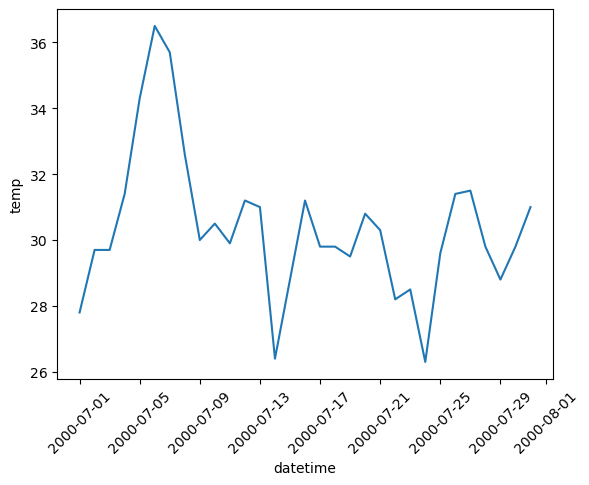

In [21]:
#JUST-FOR-CHECKING: For checking month wise temp for any city in any month of any year.
bwp1 = dff[dff['name'] == 'Lahore']
bwp12 = bwp1[(bwp1['month'] == 7) & (bwp1['year'] == 2000)]
sns.lineplot(x=bwp12.index, y='temp', data=bwp12)
plt.xticks(rotation=45)
plt.show()

In [22]:
bwp = dff[dff['name']=='Bahawalpur'].groupby(['year','month'])['temp'].mean()
df_bwp = pd.DataFrame(bwp)
df_bwp

temp
year month           
2000 1      17.537500
     3      21.945833
     4      30.685185
     5      35.570968
     6      35.620690
...               ...
2021 8      33.341935
     9      31.700000
     10     27.390323
     11     20.213333
     12     14.406452

[255 rows x 1 columns]

In [23]:
df_bwp.reset_index(inplace=True)

In [24]:
df_bwp.head(14)

,year,month,temp
0,2000,1,17.537500
1,2000,3,21.945833
2,2000,4,30.685185
3,2000,5,35.570968
4,2000,6,35.620690
5,2000,7,32.324138
6,2000,8,33.158621
7,2000,9,30.441667
8,2000,10,28.110714
9,2000,11,21.289286


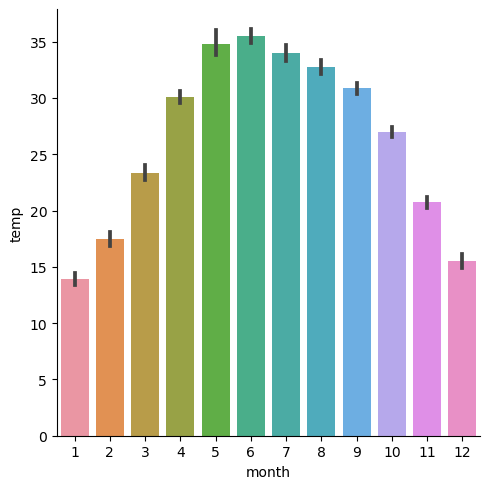

In [25]:
sns.catplot(x='month', y='temp', data=df_bwp, kind='bar')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


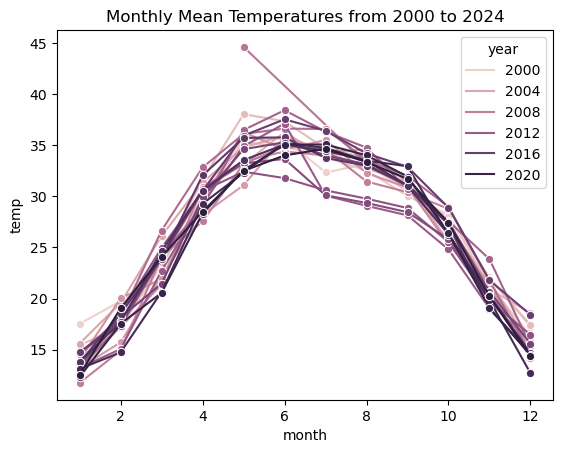

In [26]:
sns.lineplot(x='month', y='temp', hue='year', data=df_bwp, marker='o')
plt.title("Monthly Mean Temperatures from 2000 to 2024")
plt.show()

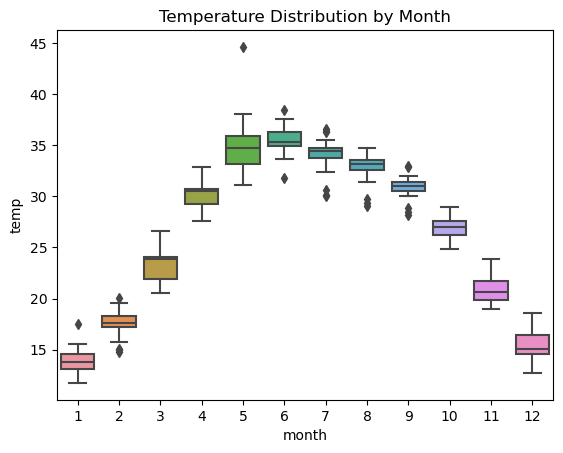

In [27]:
sns.boxplot(x='month', y='temp', data=df_bwp)
plt.title("Temperature Distribution by Month")
plt.show()

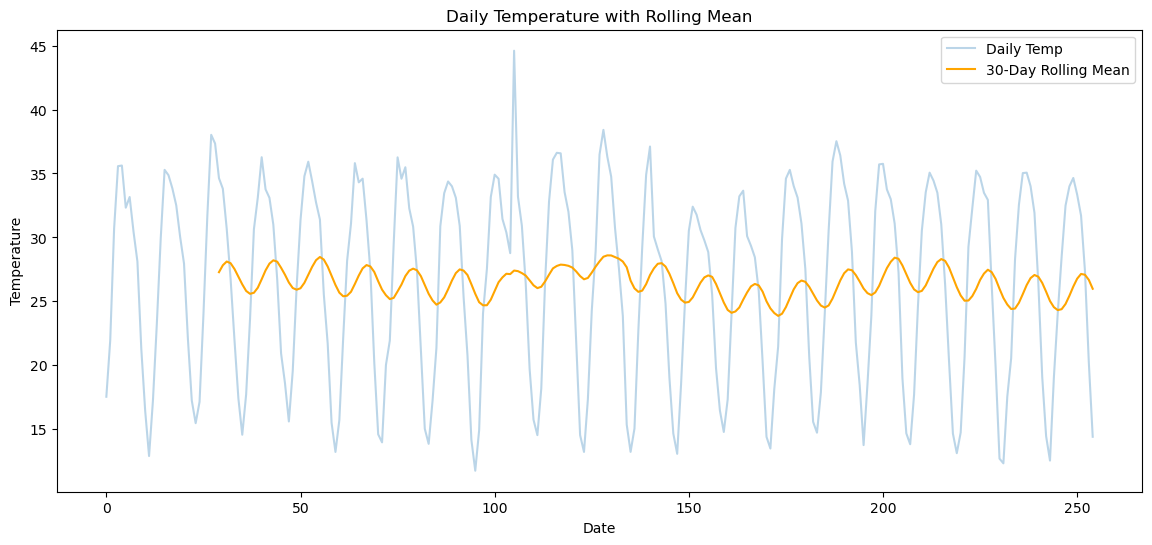

In [28]:
# Calculate a 30-day rolling mean
df_bwp['temp_rolling'] = df_bwp['temp'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_bwp.index, df_bwp['temp'], alpha=0.3, label='Daily Temp')  # Original data
plt.plot(df_bwp.index, df_bwp['temp_rolling'], color='orange', label='30-Day Rolling Mean')  # Smoothed trend
plt.title('Daily Temperature with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [29]:
#FOR graphing for each month seprately 
'''g = sns.FacetGrid(df_bwp, col="year", col_wrap=4, height=3)
g.map(sns.lineplot, "month", "temp")
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Mean Temperature")
plt.show()'''

'g = sns.FacetGrid(df_bwp, col="year", col_wrap=4, height=3)\ng.map(sns.lineplot, "month", "temp")\ng.set_titles("{col_name}")\ng.set_axis_labels("Month", "Mean Temperature")\nplt.show()'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


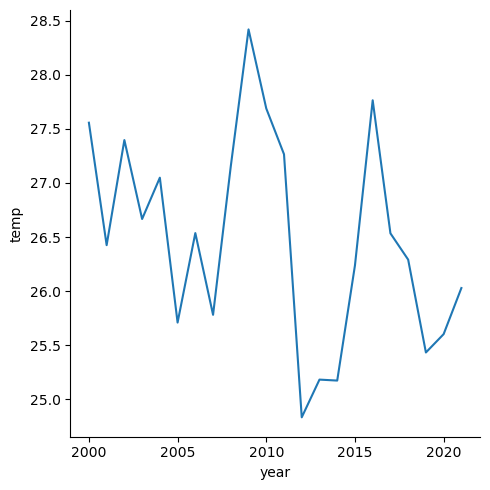

In [30]:
sns.relplot(x='year', y='temp', data=df_bwp, kind='line', ci=None)
plt.show()

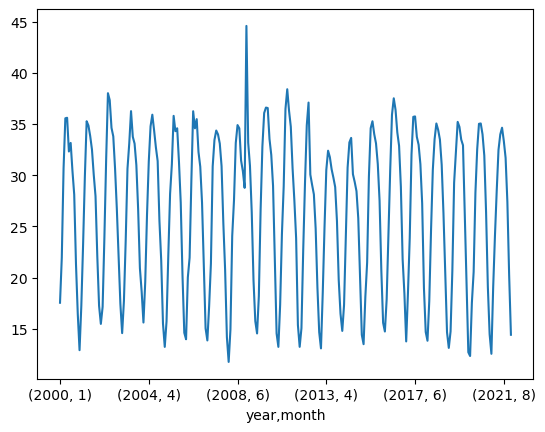

In [31]:
bwp.plot(x='month', y='temp', kind='line')
plt.show()

In [32]:
#Cheking any city  avg temp over the period of 5 years 
rwp_year= dff[dff['name']=='Lahore'].groupby(['year'])['temp'].mean().reset_index()
rwp_year['5_year_group'] = pd.cut(rwp_year['year'], bins=range(2000, 2026, 5), right=False)
ct = rwp_year.groupby('5_year_group')['temp'].mean().reset_index()
ct

C:\Users\h\AppData\Local\Temp\ipykernel_18380\3042952089.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = rwp_year.groupby('5_year_group')['temp'].mean().reset_index()


,5_year_group,temp
0,"[2000, 2005)",24.599550
1,"[2005, 2010)",23.878635
2,"[2010, 2015)",24.564253
3,"[2015, 2020)",24.504539
4,"[2020, 2025)",24.097485


In [33]:
#Precp Eanalyze_cityDA
dff['precip'].fillna(0, inplace=True)
dff.drop(columns='preciptype', inplace=True)

C:\Users\h\AppData\Local\Temp\ipykernel_18380\3906629240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['precip'].fillna(0, inplace=True)
C:\Users\h\AppData\Local\Temp\ipykernel_18380\3906629240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(columns='preciptype', inplace=True)


In [34]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126196 entries, 2000-01-01 to 2024-06-30
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   name          126196 non-null  object        
 1   tempmax       126196 non-null  float64       
 2   tempmin       126196 non-null  float64       
 3   temp          126196 non-null  float64       
 4   feelslikemax  126196 non-null  float64       
 5   feelslikemin  126196 non-null  float64       
 6   feelslike     126196 non-null  float64       
 7   humidity      126196 non-null  float64       
 8   precip        126196 non-null  float64       
 9   precipprob    126196 non-null  float64       
 10  precipcover   126196 non-null  float64       
 11  date          126196 non-null  datetime64[ns]
 12  month         126196 non-null  int32         
 13  year          126196 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(2), object(

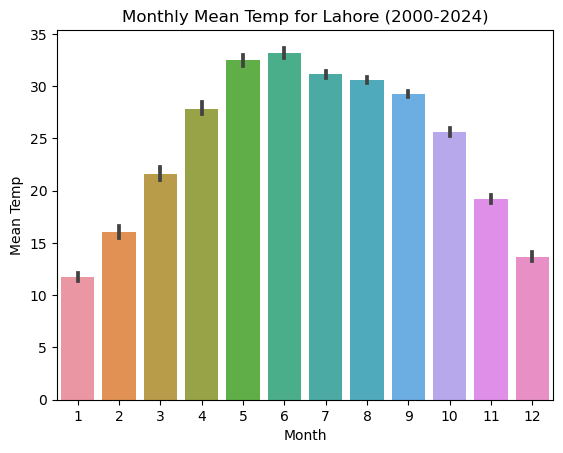

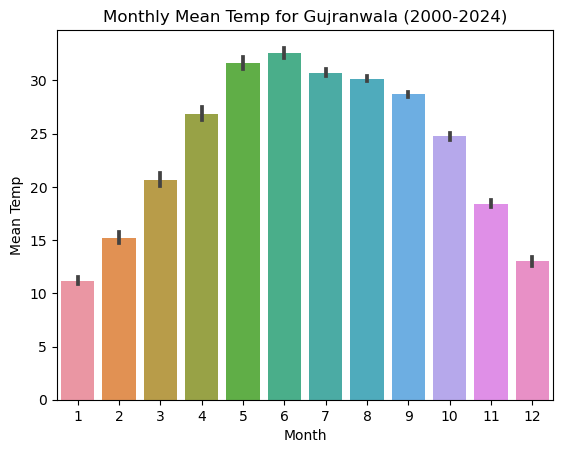

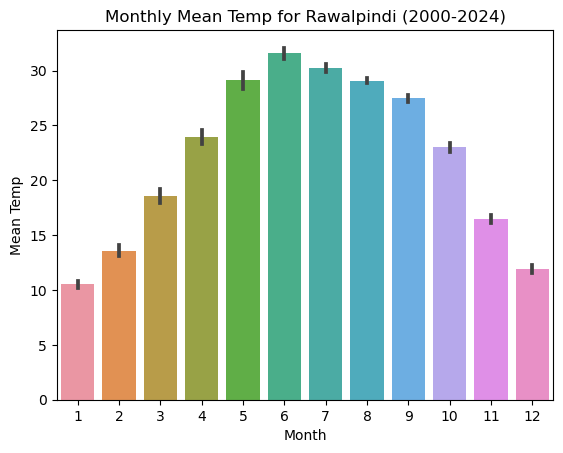

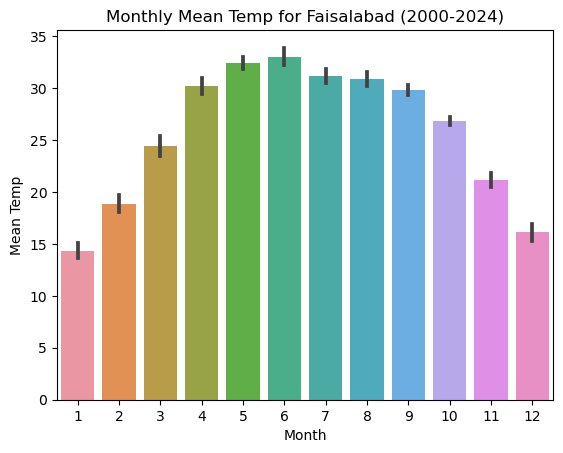

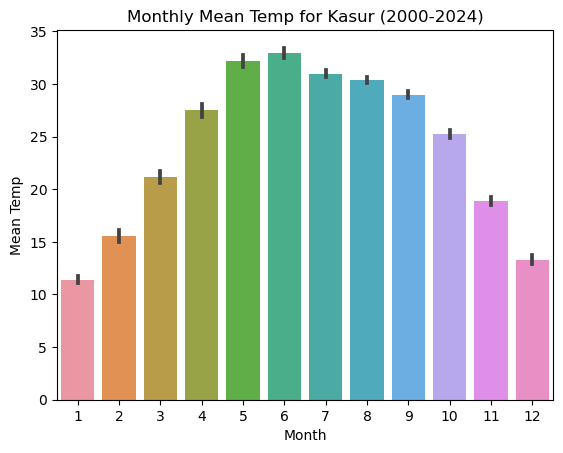

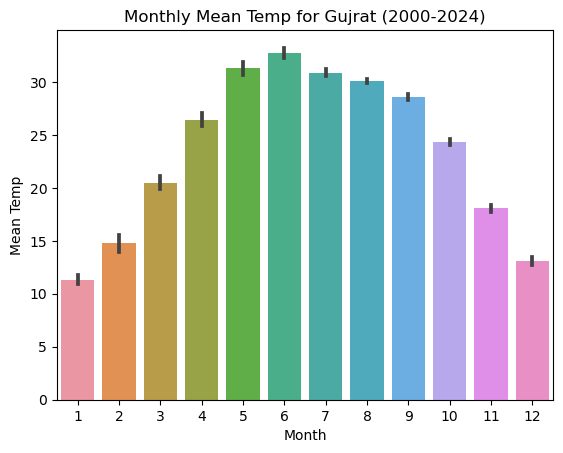

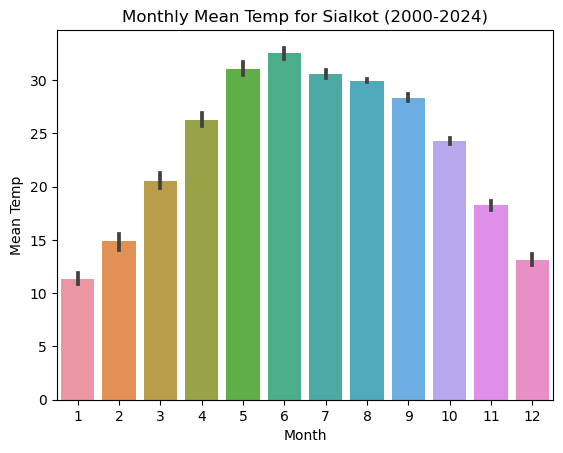

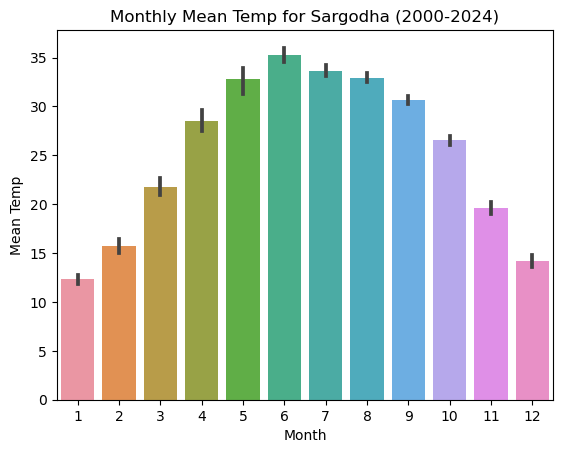

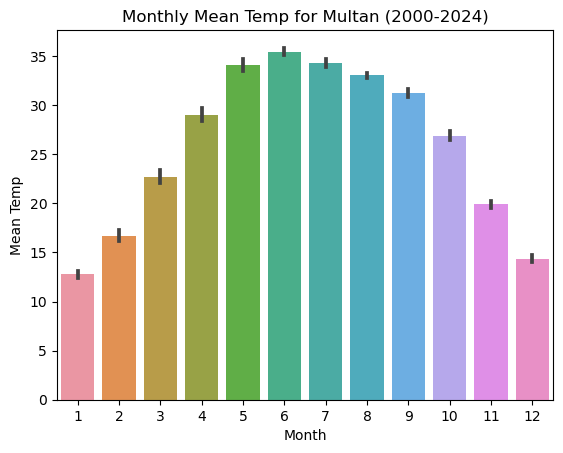

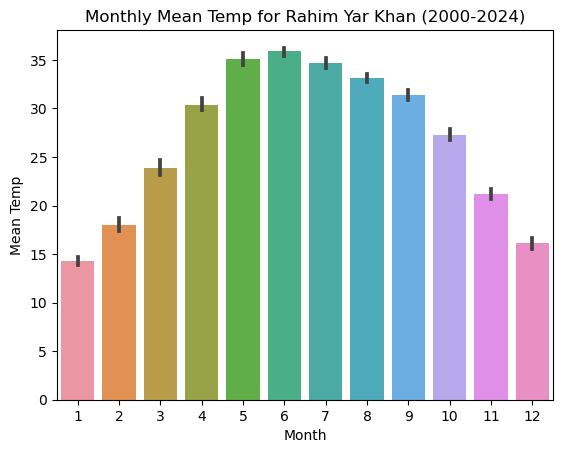

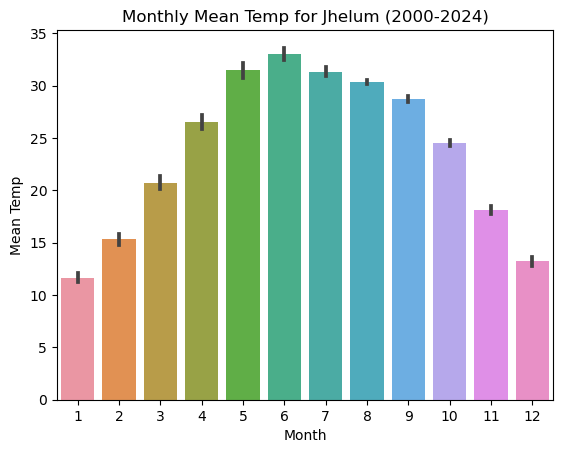

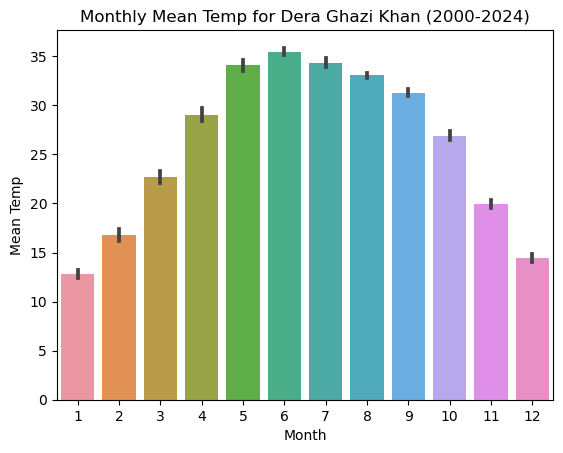

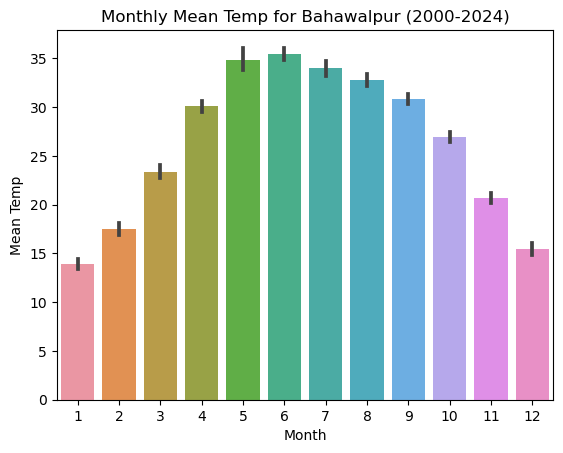

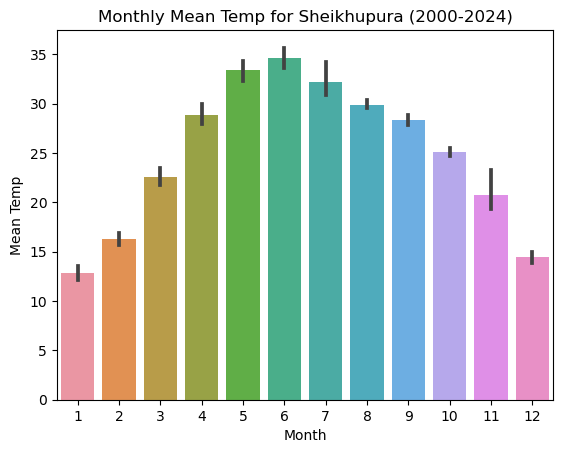

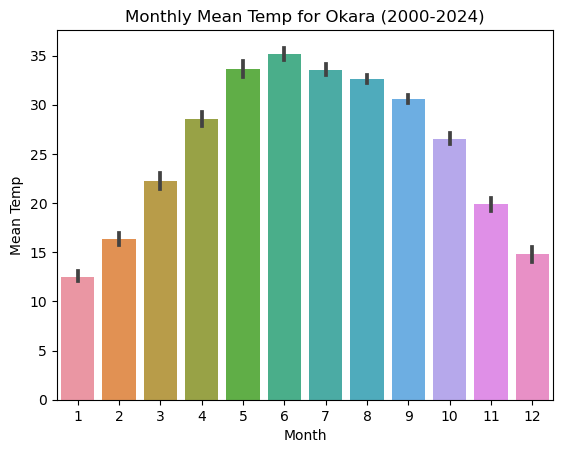

In [35]:
#AUTOMATING the EDA process for all cities
def analyze_city(dff, city_name):
    # Filter data for the specific city
    city_data = dff[dff['name'] == city_name]
    
    # Group data by year and month, then calculate the monthly mean temperature
    city_monthly = city_data.groupby(['year', 'month'])['temp'].mean().reset_index()
    
    # Create visualizations for the city
    # Line Plot
    '''plt.figure(figsize=(10, 5))
    sns.lineplot(x='month', y='temp', hue='year', data=city_monthly, marker='o')
    plt.title(f"Monthly Mean Temperatures for {city_name} (2000-2024)")
    plt.xlabel('Month')
    plt.ylabel('Mean Temperature')
    plt.legend(title='Year')
    plt.show()'''
    #BAR plot 
    sns.barplot(x='month', y='temp', data=city_monthly)
    plt.title(f"Monthly Mean Temp for {city_name} (2000-2024)")
    plt.xlabel('Month')
    plt.ylabel('Mean Temp')
    plt.show()
    # Box Plot
    '''plt.figure(figsize=(10, 5))
    sns.boxplot(x='month', y='temp', data=city_monthly)
    plt.title(f"Temperature Distribution by Month for {city_name}")
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.show()'''
    # Rolling Mean Plot
    '''city_monthly['temp_rolling'] = city_monthly['temp'].rolling(window=3).mean()  # Using a 3-month rolling window
    plt.figure(figsize=(10, 5))
    plt.plot(city_monthly['temp'], alpha=0.3, label='Monthly Mean Temp')
    plt.plot(city_monthly['temp_rolling'], color='orange', label='3-Month Rolling Mean')
    plt.title(f"Rolling Mean of Temperatures for {city_name}")
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()'''
    

    
# List of all unique cities in your dataset
cities = dff['name'].unique()

# Apply the function to each city in the list
for city in cities:
    analyze_city(dff, city)


In [36]:
#Machine Learning technique
dff.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,date,month,year
datetime,,,,,,,,,,,,,,
2000-01-01,Lahore,18.1,1.1,11.1,18.1,1.1,11.1,79.0,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Gujranwala,18.1,1.1,11.0,18.1,1.1,11.0,79.3,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Rawalpindi,18.1,3.1,9.5,18.1,3.1,9.5,69.1,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Faisalabad,14.1,9.7,12.2,14.1,9.7,12.2,96.0,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Kasur,18.1,1.1,11.0,18.1,1.1,11.0,79.2,0.0,0.0,0.0,2000-01-01,1,2000


In [37]:
dff.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,date,month,year
datetime,,,,,,,,,,,,,,
2000-01-01,Lahore,18.1,1.1,11.1,18.1,1.1,11.1,79.0,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Gujranwala,18.1,1.1,11.0,18.1,1.1,11.0,79.3,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Rawalpindi,18.1,3.1,9.5,18.1,3.1,9.5,69.1,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Faisalabad,14.1,9.7,12.2,14.1,9.7,12.2,96.0,0.0,0.0,0.0,2000-01-01,1,2000
2000-01-01,Kasur,18.1,1.1,11.0,18.1,1.1,11.0,79.2,0.0,0.0,0.0,2000-01-01,1,2000


In [38]:
dff.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'date',
       'month', 'year'],
      dtype='object')

In [39]:
#Droping non feautre coloumns
dff_drop = dff.drop(columns=['feelslikemax', 'feelslikemin', 'feelslike', 'precipprob','precipcover'])
dff_drop.head()

,name,tempmax,tempmin,temp,humidity,precip,date,month,year
datetime,,,,,,,,,
2000-01-01,Lahore,18.1,1.1,11.1,79.0,0.0,2000-01-01,1,2000
2000-01-01,Gujranwala,18.1,1.1,11.0,79.3,0.0,2000-01-01,1,2000
2000-01-01,Rawalpindi,18.1,3.1,9.5,69.1,0.0,2000-01-01,1,2000
2000-01-01,Faisalabad,14.1,9.7,12.2,96.0,0.0,2000-01-01,1,2000
2000-01-01,Kasur,18.1,1.1,11.0,79.2,0.0,2000-01-01,1,2000


In [40]:
#One-Hot Encoding: to convert name coulumsn to numerical values. 
ml = pd.get_dummies(dff_drop, columns=['name'])

In [41]:
ml.head(2)

,tempmax,tempmin,temp,humidity,precip,date,month,year,name_Bahawalpur,name_Dera Ghazi Khan,...,name_Jhelum,name_Kasur,name_Lahore,name_Multan,name_Okara,name_Rahim Yar Khan,name_Rawalpindi,name_Sargodha,name_Sheikhupura,name_Sialkot
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,18.1,1.1,11.1,79.0,0.0,2000-01-01,1,2000,False,False,...,False,False,True,False,False,False,False,False,False,False
2000-01-01,18.1,1.1,11.0,79.3,0.0,2000-01-01,1,2000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#Standarization: maintaining scale of all feautres to same level for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['tempmax', 'tempmin', 'humidity', 'precip']
ml[columns_to_standardize] = scaler.fit_transform(ml[columns_to_standardize])

In [43]:
#Converting boolean columns to binary (name_)
boolean_columns = ml.select_dtypes(include='bool').columns
ml[boolean_columns] = ml[boolean_columns].astype(int)

In [44]:
#creating day column and deleting date columns
ml['day'] = ml['date'].dt.day
new_ml = ml.drop(columns=['date'])
fd = new_ml
fd.head(3)

,tempmax,tempmin,temp,humidity,precip,month,year,name_Bahawalpur,name_Dera Ghazi Khan,name_Faisalabad,...,name_Kasur,name_Lahore,name_Multan,name_Okara,name_Rahim Yar Khan,name_Rawalpindi,name_Sargodha,name_Sheikhupura,name_Sialkot,day
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,-1.636831,-2.130944,11.1,1.205812,-0.191621,1,2000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2000-01-01,-1.636831,-2.130944,11.0,1.223676,-0.191621,1,2000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2000-01-01,-1.636831,-1.890981,9.5,0.616319,-0.191621,1,2000,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [45]:
#feature selection and target/Data splitting into test train
X = fd.drop(columns=['temp'])
y = fd['temp']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = linear_model.score(X_test, y_test)

# Print results
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R_squared: {r_squared}')

# Optional: Print coefficients to see feature importance
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Absolute Error: 0.547507594203726
Root Mean Squared Error: 0.771932259486579
R_squared: 0.9907418651717881
                      Coefficient
tempmax                  3.893149
tempmin                  4.352241
humidity                -0.149935
precip                   0.047090
month                   -0.018831
year                    -0.005963
name_Bahawalpur         -0.027174
name_Dera Ghazi Khan    -0.145904
name_Faisalabad          0.013799
name_Gujranwala          0.099816
name_Gujrat             -0.072387
name_Jhelum             -0.137188
name_Kasur               0.159171
name_Lahore              0.268146
name_Multan             -0.145076
name_Okara              -0.023869
name_Rahim Yar Khan      0.039354
name_Rawalpindi          0.269665
name_Sargodha           -0.029349
name_Sheikhupura        -0.295677
name_Sialkot             0.026673
day                     -0.000863


In [48]:
#Model 2: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')

Random Forest - Mean Absolute Error: 0.44679290808240896
Random Forest - Root Mean Squared Error: 0.6285823058075422
